In [1]:
# Este colab forma parte del video de Redes Neuronales Convolucionales del canal de Youtube "Ringa Tech"
# https://youtu.be/eGDSlW93Bng
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Cargar los datos de MNIST
#Aqui lo hago de otra manera porque es mas simple para poder usar el modulo de aumento de datos
#de Keras de esta manera
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

In [2]:
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

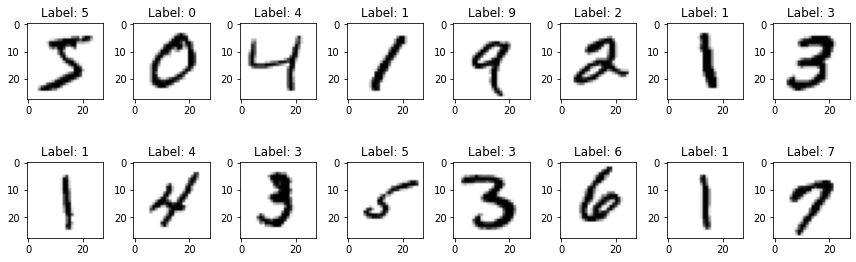

In [3]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [4]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
#rango_inclinacion=15 #No uso este de momento pero si quieres puedes probar usandolo!
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

datagen.fit(X_entrenamiento)

ANTES:



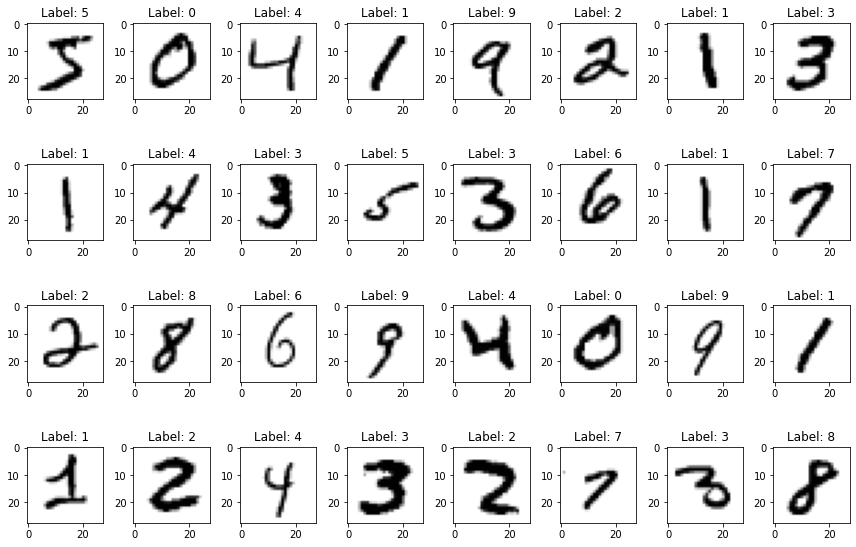

DESPUES:



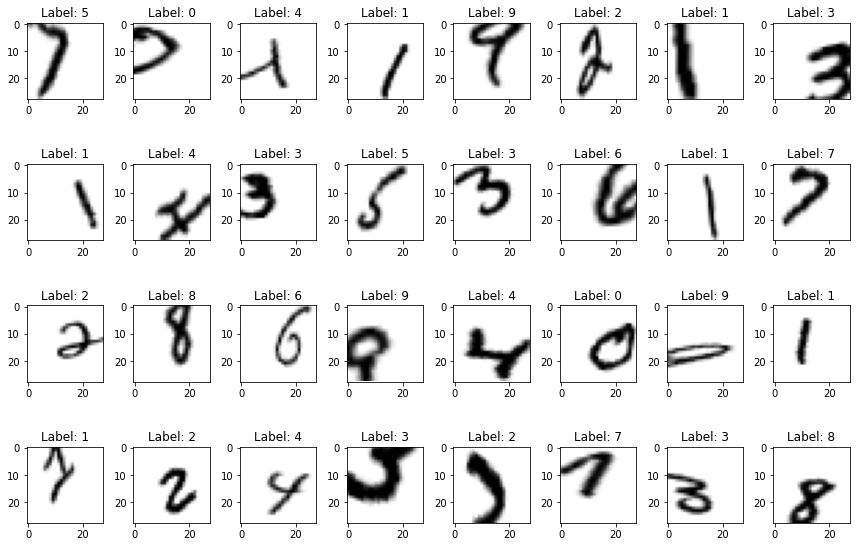

In [5]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime como se ven antes y despues de las transformaciones
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

In [6]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5), # apaga de manera aleatoria el 50% de las conexiones de la red para mejorar el entrenamiento
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [8]:
TAMANO_LOTE = 32

#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
1875/1875 [==============================] - 36s 19ms/step - loss: 1.2045 - accuracy: 0.5973 - val_loss: 0.2756 - val_accuracy: 0.9259
Epoch 2/60
1875/1875 [==============================] - 33s 18ms/step - loss: 0.6946 - accuracy: 0.7753 - val_loss: 0.1204 - val_accuracy: 0.9644
Epoch 3/60
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5801 - accuracy: 0.8135 - val_loss: 0.1014 - val_accuracy: 0.9700
Epoch 4/60
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5239 - accuracy: 0.8297 - val_loss: 0.0902 - val_accuracy: 0.9725
Epoch 5/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4866 - accuracy: 0.8437 - val_loss: 0.0796 - val_accuracy: 0.9741
Epoch 6/60
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4588 - accuracy: 0.8521 - val_loss: 0.0850 - val_accuracy: 0.9739
Epoch 7/60
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4437 - accuracy: 0.8566

In [9]:
#Exportar el modelo al explorador! (Mas detalle de esto en en mi video de exportacion: https://youtu.be/JpE4bYyRADI )
modelo.save('numeros_Aug.h5')

#Convertirlo a tensorflow.js
!mkdir carpeta_salida_3

!"C:\Users\fabian\AppData\Roaming\Python\Python310\Scripts\tensorflowjs_converter" --input_format keras numeros_Aug.h5 carpeta_salida_3

2022-04-14 15:59:25.438125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-14 15:59:25.438458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
